<a href="https://colab.research.google.com/github/EmiKaczmarczyk/MET4OP/blob/master/PASO_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly 
import geopandas as gpd
import requests
import plotly.graph_objects
import contextily as ctx
import geoplot as gplt


In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/MET4OP-UBA/MET4OP/master/dataset/elecciones_2019/resultados/120819-054029/datos_agrup.csv")

In [29]:
#Dataframe con datos presidenciales
df_presidencial= df.loc[df.NOMBRE_CATEGORIA == "Presidente y Vicepresidente de la República"]

In [30]:
total=df_presidencial.groupby("NOMBRE_AGRUPACION", as_index=False)["VOTOS_AGRUPACION"].sum().sort_values("VOTOS_AGRUPACION", ascending=False).reset_index(drop=True)
total['Porcentaje'] = (total['VOTOS_AGRUPACION'] / total['VOTOS_AGRUPACION'].sum()) * 100


In [31]:

#Agrupamos por comunas
df_comuna=df_presidencial.groupby(["NOMBRE_REGION", "NOMBRE_AGRUPACION"], as_index=False)["VOTOS_AGRUPACION"].sum()

#Abreviamos algunos nombres por prolijidad.
cambio_nombres=df_comuna.replace({"FRENTE DE TODOS": "FdT",
                                           "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FIT",
                                           "JUNTOS POR EL CAMBIO": "JxC",
                                           "FRENTE NOS":"NOS",
                                          "UNITE POR LA LIBERTAD Y LA DIGNIDAD":"UNITE"})
comuna_final=pd.DataFrame(data=cambio_nombres)

resultados_absolutos=comuna_final.loc[comuna_final.NOMBRE_AGRUPACION == "FdT"].sort_values(by="VOTOS_AGRUPACION", ascending=False)


In [32]:
#Tomo el archivo SHP de https://data.buenosaires.gob.ar/dataset/comunas
#para crear el mapa de caba
comunas_ = gpd.read_file("C:/Users/USUARIO/SHP/comunas_wgs84.shp")




C:\Users\USUARIO\anaconda3\envs\geo_env\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)
C:\Users\USUARIO\AppData\Local\Temp/ipykernel_14820/4124814973.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  aux = comunas_.centroid


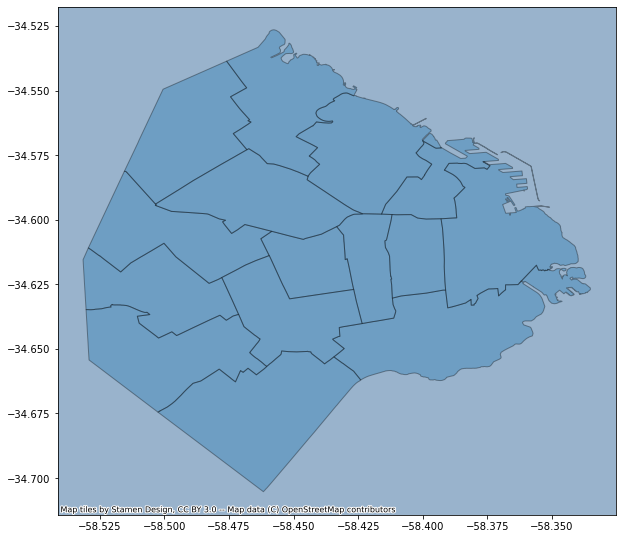

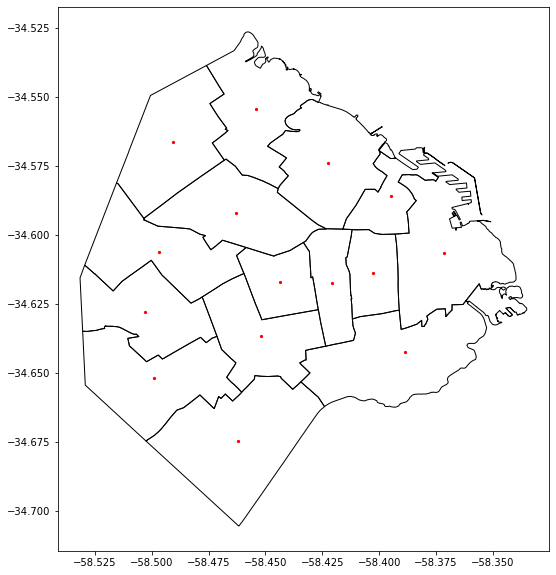

In [33]:
#Busco el EPSG

#comunas_.crs
comunas_= comunas_.to_crs(epsg=4326)
ax = comunas_.plot(figsize=(10, 10), alpha=0.35, edgecolor='k')
ctx.add_basemap(ax)

# calculo el centroide de cada radio
aux = comunas_.centroid
# ploteo mi mapa base
base = comunas_.plot( figsize=(10, 10), color='None', edgecolor='black')
# añado mis centroides
aux.plot(ax=base, marker='o', color='red', markersize=5)


In [34]:

resultados_comunas = resultados_absolutos.sort_values(by="NOMBRE_REGION", ascending=True)
comunas_['COMUNAS'] = pd.to_numeric(comunas_['COMUNAS'],downcast="integer")
comunas_ = comunas_.sort_values('COMUNAS',ascending=True)
comunas_ = comunas_.set_index(resultados_comunas.index)
comunas_['votos comuna'] = resultados_comunas['VOTOS_AGRUPACION']



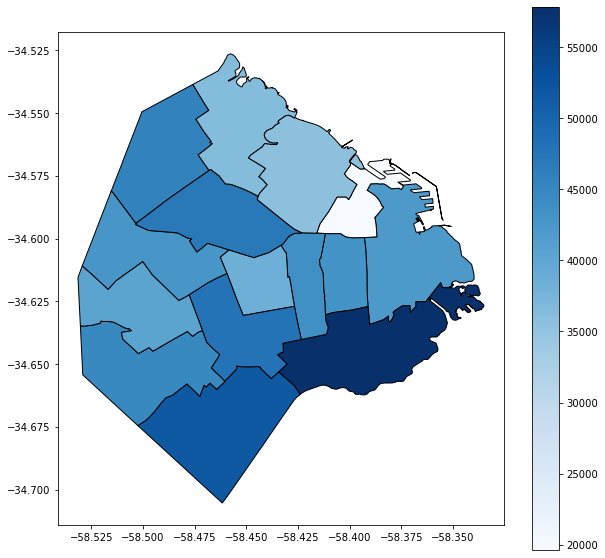

In [35]:


comunas_.plot(column='votos comuna', cmap='Blues', figsize=(10, 10), edgecolor='black', legend=True, )





